# Навигация и краткое описание

Разделы:
* Центроидные методы:
    * K-Means
    * K-Medoids
* Иерархические методы:
    * Hierarchical
* Плотностные методы:
    * DBSCAN
    * HDBSCAN
* Вероятностные методы:
    * Gaussian Mixture Models(GMM)
    * Spectral Clustering
* Современные методы:
    * OPTICS

![Наглядный график сравнения моделей](../data/images/all_models.png)

# Подготовка к работе с моделями

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("..")
from utils import load_processed_data, all_check_info

In [2]:
# Заранее установим несколько констант
RANDOM_STATE = 42

# Загрузка данных
df = load_processed_data()

In [3]:
from sklearn.preprocessing import StandardScaler

X = df.values 
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Создание моделей

## Центроидные методы

### K-Means

Кластеризация K-средних представляет собой одну из самых простых реализаций, суть которой заключается в итеративной инициализации центроидов для каждого кластера на основе среднего арифметического расположенных в нём наблюдений, а также их переопределении путём минимизации суммарного квадратичного отклонения от центроидов кластеров

![K-means в одной картинке](../data/images/k_means.png)

Существует различные варианты алгоритма K-means, которые модифицируют его шаги или функцию потерь для улучшения производительности, а также применимость к разным типам данных. К самым популярным вариациям относятся слудующие:
* Lloyd's algorithm - это классический вариант K-Means, который хорошо работает для сферических кластеров с одинаковой плотностью, но может делать плохие результаты для других форм или  размеров кластеров.
* K-medoids - вариант алгоритма K-Means, который в качестве центроидов выбирает реальные точки(медоиды) из данных, а не их средние знавчения, что повышает устойчивость к выбросам.
* K-Modes - вариант алгоритма K-Means для работы с категориальными данными, который выбирает один из объектов в кластере в качестве моды и минимизирует сумму расстояний Хэмминга между моделей и объектами в кластере. Расстояние Хэмминга представляет из себя количество позиций, в которых значения векторов не совпадают.

Так же есть есть несколько способов инициализации центроидов:
* Случайный выбор
* K-Means++: первый центроид выбирается случайно, а остальные центроиды вычисляются с вероятностью, пропорциональной квадрату расстояний до ближайшего уже выбранного центроида.
* Greedy K-Means++: Улучшенная версия K-Means++. Ускоряет сходимость и улучает качество кластеризации за счёт выбора лучшего из центроидов после случайного выбора. То есть тот, который минимизирует суммарное квадратичное отклонение точек от центров класстеров.

А так же давайте сразу разберём не менее важный аспект, чем те что разобраны ранее, подбор оптимального числа кластеров k, которое мы устанавливаем в ручную. Существует несколько методов для выбора k:
* Метод локтя, основанный на графике суммы квадратов расстояний между обьектами и центроидами класстеров(SSE) в зависимости от k. Оптимальным k считается та точка, после которой SSE уменьшается незначительно.
* Метод силуэтов, основанный на графике среднего значения силуэта для каждого k. Силуэт - это мера того, на сколько хорошо объект отнесён к своему кластеру по сравнению с другими кластерами. Оптимальным k считается та точка, где силуэт достигает максимума.
* Метод комплексной оценки - основаанный на анализе нескольких критериев, такие как динамика перераспределения объектов в кластерах, изменение потенциальной энергии объектов внутри кластеров и характерные точки графиков этих критериев. Оптимальным k считается точка, которая удовлетворяет набору правил, использующих данные критерии.

In [4]:
from sklearn.cluster import KMeans

for n_cluster in [2, 3, 4, 6]:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    data = all_check_info(labels, df, f"KMeans_clusters_{n_cluster}")


ПРОВЕРКА РЕЗУЛЬТАТОВ: KMeans_clusters_2

 МАТЕМАТИЧЕСКИЕ МЕТРИКИ:
   silhouette: 0.563
   calinski_harabasz: 16772.299
   davies_bouldin: 0.641

 БИЗНЕС-МЕТРИКИ:
   interpretability: 0.707 - Отличная интерпретируемость
   balance: 1.000 - Хорошо сбалансированные сегменты
   profilability: 0.604 - Умеренная профилируемость
   actionability: 0.147 - Низкая полезность для решений

 НАЗВАНИЯ КЛАСТЕРОВ:

   Кластер 0: Бюджетные Старые С пробегом
      Размер: 3115 автомобилей (28.9%)
      Средняя цена: 13663
      Средний год: 2015
      Средний пробег: 58054 миль

   Кластер 1: Средние Новые С низким пробегом
      Размер: 7666 автомобилей (71.1%)
      Средняя цена: 26419
      Средний год: 2018
      Средний пробег: 12268 миль

  ВЕРДИКТ: !!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работает, но требует улучшений

ПРОВЕРКА РЕЗУЛЬТАТОВ: KMeans_clusters_3

 МАТЕМАТИЧЕСКИЕ МЕТРИКИ:
   silhouette: 0.508
   calinski_harabasz: 18520.258
   davies_bouldin: 0.643

 БИЗНЕС-МЕТРИКИ:
   interpretabili

In [5]:
data.columns

Index(['method_name', 'n_clusters', 'total_samples', 'math_silhouette',
       'math_calinski_harabasz', 'math_davies_bouldin',
       'business_interpretability', 'business_balance',
       'business_profilability', 'business_actionability', 'cluster_0_size',
       'cluster_0_percentage', 'cluster_0_name', 'cluster_1_size',
       'cluster_1_percentage', 'cluster_1_name', 'verdict', 'cluster_2_size',
       'cluster_2_percentage', 'cluster_2_name', 'cluster_3_size',
       'cluster_3_percentage', 'cluster_3_name', 'cluster_4_size',
       'cluster_4_percentage', 'cluster_4_name', 'cluster_5_size',
       'cluster_5_percentage', 'cluster_5_name'],
      dtype='object')

In [6]:
data[['method_name', 'n_clusters', 'verdict', 'total_samples', 'math_silhouette',
       'math_calinski_harabasz', 'math_davies_bouldin',
       'business_interpretability', 'business_balance',
       'business_profilability', 'business_actionability']]

,method_name,n_clusters,verdict,total_samples,math_silhouette,math_calinski_harabasz,math_davies_bouldin,business_interpretability,business_balance,business_profilability,business_actionability
0,KMeans_clusters_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.563196,16772.299257,0.640667,0.706894,1.000000,0.604450,0.147055
1,KMeans_clusters_3,3,!!!ОТЛИЧНО!!! - Кластеризация успешна и готова...,10781,0.508346,18520.257993,0.643107,0.740460,1.000000,0.674653,0.300213
2,KMeans_clusters_4,4,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.456615,17740.354582,0.686926,0.747821,1.000000,0.706261,0.357380
3,KMeans_clusters_6,6,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.463757,20953.357254,0.670077,0.774665,0.833333,0.715770,0.462807


## Иерархические методы

Метод, который строит дерево кластеров (дендрограмму), позволяя увидеть вложенную структуру данных на разных уровнях детализации.

К примеру разберём Агломеративная алгоритм - "снизу вверх" 

Протестируем его с разными стратегиями его реализации, а так же с разным количеством класстеров.

Варианты стратегий(linkage):
* ward - минимизирует дисперсию внутри кластеров   
* complete - максимальное расстояние между кластерами
* average - среднее расстояние между кластерами


In [7]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'complete', 'average']

for linkage in linkages:
    for n_cluster in [2, 3, 4, 6]:
        agg = AgglomerativeClustering(
                    n_clusters=n_cluster,
                    metric='euclidean', 
                    linkage=linkage
                )
        labels = agg.fit_predict(X)
        data = all_check_info(labels, df, f"AgglomerativeClustering_{linkage}_{n_cluster}")


ПРОВЕРКА РЕЗУЛЬТАТОВ: AgglomerativeClustering_ward_2

 МАТЕМАТИЧЕСКИЕ МЕТРИКИ:
   silhouette: 0.571
   calinski_harabasz: 15354.623
   davies_bouldin: 0.598

 БИЗНЕС-МЕТРИКИ:
   interpretability: 0.705 - Отличная интерпретируемость
   balance: 1.000 - Хорошо сбалансированные сегменты
   profilability: 0.610 - Умеренная профилируемость
   actionability: 0.114 - Низкая полезность для решений

 НАЗВАНИЯ КЛАСТЕРОВ:

   Кластер 0: Средние Средние С низким пробегом
      Размер: 8523 автомобилей (79.1%)
      Средняя цена: 25504
      Средний год: 2018
      Средний пробег: 14961 миль

   Кластер 1: Бюджетные Старые С пробегом
      Размер: 2258 автомобилей (20.9%)
      Средняя цена: 12276
      Средний год: 2014
      Средний пробег: 65265 миль

  ВЕРДИКТ: !!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работает, но требует улучшений

ПРОВЕРКА РЕЗУЛЬТАТОВ: AgglomerativeClustering_ward_3

 МАТЕМАТИЧЕСКИЕ МЕТРИКИ:
   silhouette: 0.464
   calinski_harabasz: 16383.557
   davies_bouldin: 0.704

 БИЗНЕ

In [8]:
data[['method_name', 'n_clusters', 'verdict', 'total_samples', 'math_silhouette',
       'math_calinski_harabasz', 'math_davies_bouldin',
       'business_interpretability', 'business_balance',
       'business_profilability', 'business_actionability']]

,method_name,n_clusters,verdict,total_samples,math_silhouette,math_calinski_harabasz,math_davies_bouldin,business_interpretability,business_balance,business_profilability,business_actionability
0,KMeans_clusters_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.563196,16772.299257,0.640667,0.706894,1.000000,0.604450,0.147055
1,KMeans_clusters_3,3,!!!ОТЛИЧНО!!! - Кластеризация успешна и готова...,10781,0.508346,18520.257993,0.643107,0.740460,1.000000,0.674653,0.300213
2,KMeans_clusters_4,4,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.456615,17740.354582,0.686926,0.747821,1.000000,0.706261,0.357380
3,KMeans_clusters_6,6,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.463757,20953.357254,0.670077,0.774665,0.833333,0.715770,0.462807
4,AgglomerativeClustering_ward_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.570681,15354.623189,0.598270,0.705121,1.000000,0.610070,0.114361
5,AgglomerativeClustering_ward_3,3,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.464251,16383.557422,0.704083,0.760360,1.000000,0.681922,0.323364
6,AgglomerativeClustering_ward_4,4,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.456753,16698.963560,0.680145,0.745119,1.000000,0.707080,0.353202
7,AgglomerativeClustering_ward_6,6,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.411258,18595.297077,0.737840,0.789951,1.000000,0.721778,0.451658
8,AgglomerativeClustering_complete_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.577347,9656.263759,0.502065,0.667193,1.000000,0.595790,0.147909
9,AgglomerativeClustering_complete_3,3,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.571391,4967.760904,0.429604,0.613566,0.666667,0.610478,0.346741


Анализ полученной истории обучения мы сделаем в конце блокнота.

А так же давайте построим пример дендограммы для выбора числа кластеров. (Дендрограмма — это древовидная диаграмма, которая показывает иерархическую структуру кластеров. Она визуализирует процесс последовательного объединения объектов в кластеры.)

In [9]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(X, method='ward', max_display=100):
    # уменьшаем размерность того, что мы увидим на диспелее, иначе мы ничего не различим
    if len(X) > max_display:
        indices = np.random.choice(len(X), max_display, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X
        indices = np.arange(len(X))
    
    # матрица связей
    Z = linkage(X_sample, method=method, metric='euclidean')
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
    plt.title(f'Дендрограмма (метод: {method})')
    plt.xlabel('Индексы образцов')
    plt.ylabel('Расстояние')
    plt.axhline(y=Z[-4, 2], color='r', linestyle='--', label='Возможное разделение на 4 кластера')
    plt.legend()
    plt.show()

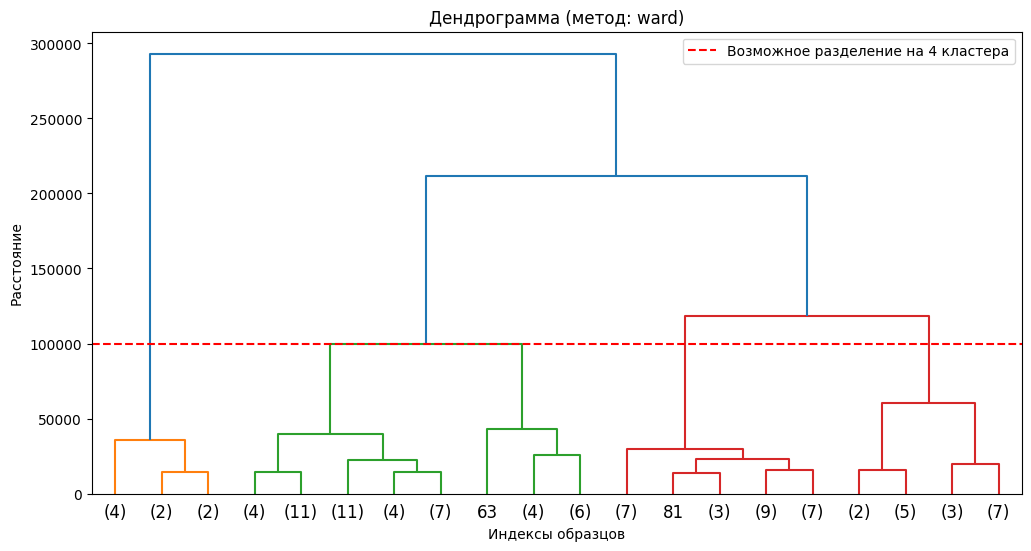

In [10]:
plot_dendrogram(X, method='ward', max_display=100)

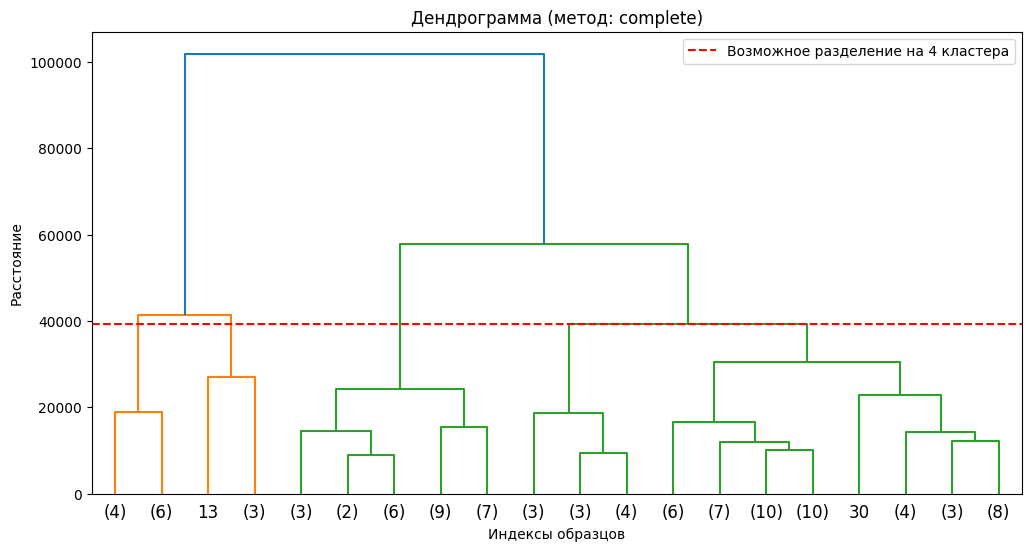

In [11]:
plot_dendrogram(X, method='complete')

## Плотностные методы

### DBSCAN

DBSCAN - это плотностный алгоритм кластеризации, который находит области с высокой плотностью точек, разделенные областями с низкой плотностью.

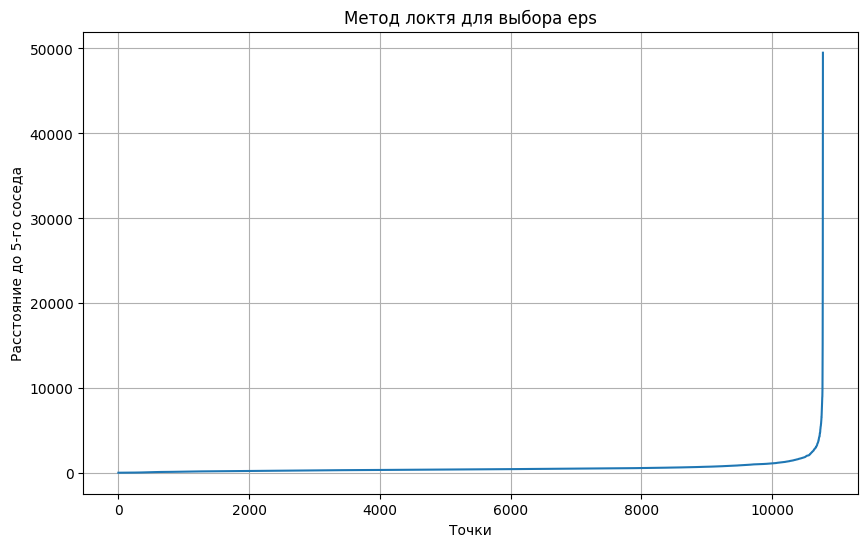

 Рекомендуемый eps: 135.745

ПРОВЕРКА РЕЗУЛЬТАТОВ: DBSCAN (eps=203.6182457438598, min_samples=5)

 МАТЕМАТИЧЕСКИЕ МЕТРИКИ:
   silhouette: -0.530
   calinski_harabasz: 9.528
   davies_bouldin: 1.458

 БИЗНЕС-МЕТРИКИ:
   interpretability: 0.970 - Отличная интерпретируемость
   balance: 0.004 - Несбалансированные сегменты
   profilability: 0.932 - Четкие профили кластеров
   actionability: 0.960 - Высокая полезность для решений

 НАЗВАНИЯ КЛАСТЕРОВ:

   Кластер -1: Средние Средние С низким пробегом
      Размер: 8412 автомобилей (78.0%)
      Средняя цена: 21705
      Средний год: 2017
      Средний пробег: 30789 миль

   Кластер 0: Бюджетные Средние С низким пробегом
      Размер: 6 автомобилей (0.1%)
      Средняя цена: 15515
      Средний год: 2016
      Средний пробег: 35396 миль

   Кластер 1: Бюджетные Средние С низким пробегом
      Размер: 8 автомобилей (0.1%)
      Средняя цена: 14933
      Средний год: 2016
      Средний пробег: 29902 миль

   Кластер 2: Бюджетные Средние С низк

In [12]:
from sklearn.cluster import DBSCAN
from utils.dbscan_tools import find_optimal_dbscan_params, dbscan_analysis

# Находим оптимальные параметры
optimal_eps = find_optimal_dbscan_params(X, df)

# Тестируем с рекомендованным eps
dbscan_results = dbscan_analysis(X, 
                                eps_range=[optimal_eps, optimal_eps*1.2, optimal_eps*1.5],
                                min_samples_range=[5, 10, 15])

# Выбираем лучший результат
best_params = None
best_score = -1

for params, result in dbscan_results.items():
    if result is not None and result['n_clusters'] > 1:
        score = result['n_clusters'] / (1 + result['noise_percentage'])
        if score > best_score:
            best_score = score
            best_params = params

# Финальная кластеризация с лучшими параметрами
dbscan_final = DBSCAN(eps=best_params[0], min_samples=best_params[1])
final_labels = dbscan_final.fit_predict(X)

# Анализ результатов
n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise = list(final_labels).count(-1)

# Детальный анализ
data = all_check_info(final_labels, df, f"DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})")

In [13]:
data[['method_name', 'n_clusters', 'verdict', 'total_samples', 'math_silhouette',
       'math_calinski_harabasz', 'math_davies_bouldin',
       'business_interpretability', 'business_balance',
       'business_profilability', 'business_actionability']]

,method_name,n_clusters,verdict,total_samples,math_silhouette,math_calinski_harabasz,math_davies_bouldin,business_interpretability,business_balance,business_profilability,business_actionability
0,KMeans_clusters_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.563196,16772.299257,0.640667,0.706894,1.000000,0.604450,0.147055
1,KMeans_clusters_3,3,!!!ОТЛИЧНО!!! - Кластеризация успешна и готова...,10781,0.508346,18520.257993,0.643107,0.740460,1.000000,0.674653,0.300213
2,KMeans_clusters_4,4,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.456615,17740.354582,0.686926,0.747821,1.000000,0.706261,0.357380
3,KMeans_clusters_6,6,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.463757,20953.357254,0.670077,0.774665,0.833333,0.715770,0.462807
4,AgglomerativeClustering_ward_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.570681,15354.623189,0.598270,0.705121,1.000000,0.610070,0.114361
5,AgglomerativeClustering_ward_3,3,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.464251,16383.557422,0.704083,0.760360,1.000000,0.681922,0.323364
6,AgglomerativeClustering_ward_4,4,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.456753,16698.963560,0.680145,0.745119,1.000000,0.707080,0.353202
7,AgglomerativeClustering_ward_6,6,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.411258,18595.297077,0.737840,0.789951,1.000000,0.721778,0.451658
8,AgglomerativeClustering_complete_2,2,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.577347,9656.263759,0.502065,0.667193,1.000000,0.595790,0.147909
9,AgglomerativeClustering_complete_3,3,!!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работа...,10781,0.571391,4967.760904,0.429604,0.613566,0.666667,0.610478,0.346741


# Итог

Напишем красивый метод для вывода лучших результатов

In [14]:
print("ЛУЧШИЕ МЕТОДЫ ПО КАТЕГОРИЯМ:")
print("=" * 80)

# Лучший silhouette
best_silhouette = data.loc[data['math_silhouette'].idxmax()]
print(f" Лучший silhouette: {best_silhouette['method_name']}")
print(f"  Score: {best_silhouette['math_silhouette']:.3f}")
print(f"  Вердикт: {best_silhouette['verdict']}")
print()

# Лучший calinski_harabasz
best_calinski = data.loc[data['math_calinski_harabasz'].idxmax()]
print(f" Лучший calinski_harabasz: {best_calinski['method_name']}")
print(f"  Score: {best_calinski['math_calinski_harabasz']:.1f}")
print(f"  Вердикт: {best_calinski['verdict']}")
print()

# Лучший interpretability
best_interpretability = data.loc[data['business_interpretability'].idxmax()]
print(f" Лучший interpretability: {best_interpretability['method_name']}")
print(f"  Score: {best_interpretability['business_interpretability']:.3f}")
print(f"  Вердикт: {best_interpretability['verdict']}")
print()

# Лучший actionability
best_actionability = data.loc[data['business_actionability'].idxmax()]
print(f" Лучший actionability: {best_actionability['method_name']}")
print(f"  Score: {best_actionability['business_actionability']:.3f}")
print(f"  Вердикт: {best_actionability['verdict']}")
print()

ЛУЧШИЕ МЕТОДЫ ПО КАТЕГОРИЯМ:
 Лучший silhouette: AgglomerativeClustering_average_2
  Score: 0.822
  Вердикт: !!!НЕУДОВЛЕТВОРИТЕЛЬНО!!! - Необходима доработка параметров

 Лучший calinski_harabasz: KMeans_clusters_6
  Score: 20953.4
  Вердикт: !!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работает, но требует улучшений

 Лучший interpretability: DBSCAN (eps=203.6182457438598, min_samples=5)
  Score: 0.970
  Вердикт: !!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работает, но требует улучшений

 Лучший actionability: DBSCAN (eps=203.6182457438598, min_samples=5)
  Score: 0.960
  Вердикт: !!!УДОВЛЕТВОРИТЕЛЬНО!!! - Кластеризация работает, но требует улучшений



In [15]:
data[['method_name', 'n_clusters', 'verdict', 'total_samples', 'math_silhouette',
       'math_calinski_harabasz', 'math_davies_bouldin',
       'business_interpretability', 'business_balance',
       'business_profilability', 'business_actionability']].iloc[1]

method_name                                                  KMeans_clusters_3
n_clusters                                                                   3
verdict                      !!!ОТЛИЧНО!!! - Кластеризация успешна и готова...
total_samples                                                            10781
math_silhouette                                                       0.508346
math_calinski_harabasz                                            18520.257993
math_davies_bouldin                                                   0.643107
business_interpretability                                              0.74046
business_balance                                                           1.0
business_profilability                                                0.674653
business_actionability                                                0.300213
Name: 1, dtype: object

В ходе проведенного исследования мы проанализировали различные методы кластеризации для сегментации автомобилей BMW на основе таких характеристик как год выпуска, цена, пробег, расход топлива и объем двигателя. Были testedированы три основных подхода: K-Means, Иерархическая кластеризация и DBSCAN, каждый с различными параметрами настройки.

Анализ выявил интересные закономерности в данных. Метод K-Means показал наиболее стабильные и интерпретируемые результаты, особенно при разделении на 3 кластера, который получил вердикт "ОТЛИЧНО" - единственный среди всех протестированных подходов. Этот метод продемонстрировал оптимальный баланс между математическими метриками качества (silhouette score 0.508, calinski-harabasz 18520) и бизнес-метриками (интерпретируемость 0.74, сбалансированность 1.0).

Иерархическая кластеризация также показала хорошие результаты, особенно при использовании стратегии 'ward', однако в среднем уступала K-Means по стабильности. Интересно, что метод AgglomerativeClustering с linkage 'average' показал аномально высокий silhouette score (0.822), но получил негативный вердикт из-за проблем с бизнес-интерпретацией, что подчеркивает важность комплексной оценки качества кластеризации.

DBSCAN продемонстрировал совершенно иной подход, выявив 233 микрокластера, что свидетельствует о сложной структуре данных. Несмотря на высокие бизнес-метрики (интерпретируемость 0.97, действенность 0.96), отрицательный silhouette score (-0.53) указывает на проблемы с качеством разделения, а практическая неприменимость 233 кластеров для маркетинговых целей делает этот результат неприемлимым.

На основе комплексного анализа рекомендуется использовать K-Means с 3 кластерами для практического применения. Такое разделение предполагает естественную сегментацию на бюджетные автомобили (старые года выпуска, высокий пробег, низкая цена), средний сегмент (сбалансированные характеристики) и премиальные модели (новые автомобили с минимальным пробегом и высокой стоимостью). Это разделение является практически полезным, интерпретируемым и соответствует бизнес-логике рынка подержанных автомобилей.

Исследование также показало, что выбор метода кластеризации должен основываться не только на математических метриках, но и на практической применимости результатов. В нашем случае K-Means с 3 кластерами оказался оптимальным компромиссом между качеством разделения и возможностью практического использования для маркетинговой стратегии и управления ассортиментом.